In [1]:
import os
os.chdir("../")

import torch
import matplotlib.pyplot as plt

from models.bs_class import Bs

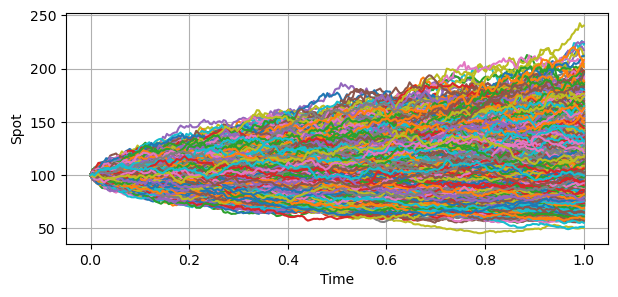

In [2]:
torch.manual_seed(42)

dt = torch.tensor(1 / 252)
T = 1.0
S0 = torch.tensor(100.0)

mu = torch.tensor(0.1)
sigma = torch.tensor(0.2)

bs_model = Bs(mu, sigma)
S = bs_model.simulate(S0, dt, T, M=10000)

plt.figure(figsize=(7,3))
plt.plot(torch.linspace(0, T, len(S)), S.detach())
plt.xlabel('Time')
plt.ylabel('Spot')
plt.grid()
plt.show()

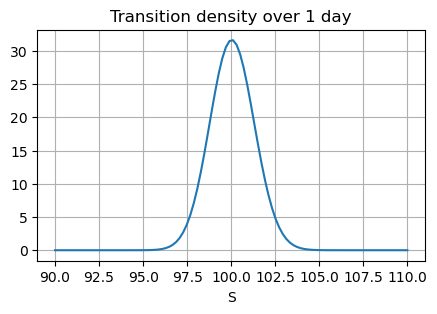

In [3]:
plt.figure(figsize=(5, 3))

S_next = torch.linspace(S0 - 10, S0 + 10, 100)
transition = bs_model.transition(S0, S_next, dt)
plt.plot(S_next, transition.detach())
plt.grid()
plt.xlabel('S')
plt.title(f'Transition density over {int(dt * 252)} day')
plt.show()

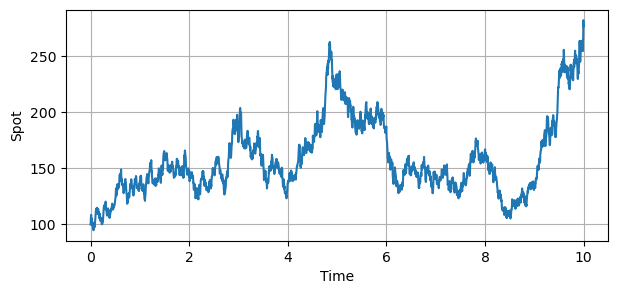

In [4]:
torch.manual_seed(42)

T = torch.tensor(10.0, requires_grad=False)
h = torch.tensor(1/252, requires_grad=False)
S0 = torch.tensor(100.0)

mu_true = torch.tensor(0.1)
sigma_true = torch.tensor(0.3)
bs_model = Bs(mu_true, sigma_true)
S = bs_model.simulate(S0, delta_t=h, T=T, M=1).squeeze()

plt.figure(figsize=(7,3))
plt.plot(torch.linspace(0, T, len(S)), S)
plt.xlabel('Time')
plt.ylabel('Spot')
plt.grid()
plt.show()

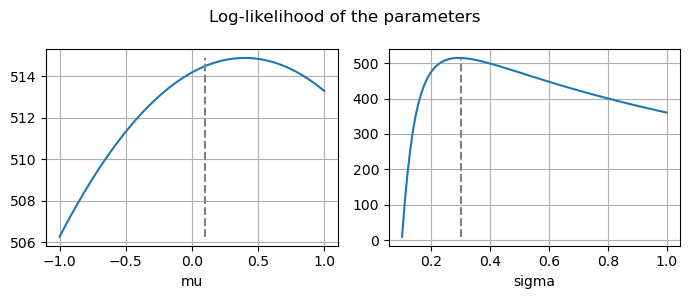

In [6]:
t = 252 
window = 200
n_params = 2
fig, axs = plt.subplots(figsize=(7, 3), nrows=1, ncols=n_params)

mus = torch.linspace(-1.0, 1.0, 100)
likelihood = torch.zeros_like(mus)
for i, mu in enumerate(mus):
    model = Bs(mu, sigma_true)
    likelihood[i] = model.forward(S, t, h, window)
axs[0].plot(mus, likelihood.detach(), label='log-likelihood')
axs[0].vlines(mu_true, torch.min(likelihood.detach()), torch.max(likelihood.detach()), linestyles='dashed', colors='grey', label='true')
axs[0].set_xlabel('mu')

sigmas = torch.linspace(0.1, 1.0, 100)
likelihood = torch.zeros_like(sigmas)
for i, sigma in enumerate(sigmas):
    model = Bs(mu_true, sigma)
    likelihood[i] = model.forward(S, t, h, window)
axs[1].plot(sigmas, likelihood.detach(), label='log-likelihood')
axs[1].vlines(sigma_true, torch.min(likelihood.detach()), torch.max(likelihood.detach()), linestyles='dashed', colors='grey', label='true')
axs[1].set_xlabel('sigma')

for i in range(n_params):
    axs[i].grid()

fig.suptitle('Log-likelihood of the parameters')
fig.tight_layout()